# Class 02 : 미분 규칙과 다변수함수 미분

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp

sp.init_printing()

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 도함수와 여러 함수들의 미분

### 도함수The Derivative as a Function

- 미분계수를 함수값으로 가지는 함수, 미분 가능한 함수 $y=f(x)$의 도함수는

$$
f'(x) = \frac{d}{dx} f(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

<img src="imgs/deriv-ani.gif"/>


- 위 그림은 원함수 $x^3 - 5x$의 모든 점에서 미분계수를 구해서 그 값을 다시 아래쪽 그림에 그린것이다. 

- 따라서 아래쪽 그림의 함수값은 위쪽 함수의 기울기값을 나타낸다. 

- 그래프의 빨간색 구간은 양의 기울기, 초록색 구간은 음의 기울기를 나타낸다.

#### 용어

- 미분하다.differentiation, 미분한 결과derivative

> "The process of calculating a derivative is called differentiation."
>
> "If $f'$ exists at a particular $x$, we say that $f$ is differentiable (has a derivative) at $x$. If $f'$ exists at every point in the domain of $f$, we call $f$ differentiable."



#### 기호<sup>[wiki:deriv]</sup>

- $y = f(x)$일 때 아래 기호는 모두 함수 $f(x)$의 $x$에 대한 미분을 나타낸다.

    - **Leibniz's notation** : $\dfrac{dy}{dx} = \dfrac{df}{dx} = \dfrac{d}{dx}f(x)$

    - **Lagrange's notation** : $f'(x)$, $ y' $
    
    - Newton's notation : $\dot{y}$, $\ddot{y}$ 
    
    - Euler's notation :  $ D_{x}y$,$ D_{x}f(x)$, $D^{2}_{x}y$
    


### 다항 함수의 미분<sup>[paul]</sup>

#### 공식 

$$
f(x) = x^n , \qquad \frac{d (f(x))}{dx} = n x ^{n-1}
$$

***

#### 증명

$$
\begin{aligned}
\frac{df(x)}{dx} 
&= \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} = \lim_{h \to 0} \frac{(x+h)^n -  x^n}{h} \\[10pt]
&= \lim_{h \to 0} \frac{\{(x+h) - x\}\{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\}}{h} \\
& \because a^n - b^n = (a-b)(a^{n-1} + a^{n-2}b + a^{n-3}b^2 + \cdots +a^2b^{n-3}+ ab^{n-2} + b^{n-1}) \\[10pt]
&= \lim_{h \to 0} \{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\} \\[10pt]
&= \underbrace{(x)^{n-1} + (x)^{n-1} + \cdots + (x)^{n-1}}_{n} \\[10pt]
&= n x^{n-1}
\end{aligned}
$$

#### 다항함수 미분 예제  $ y = x^2 $

- 위 함수의 도함수를 구하기 위해서 미분의 정의를 이용하면 아래와 같다.

$$
\lim_{h \to 0} \frac{(x+h)^2 - x^2}{h} = \lim_{h \to 0} \frac{x^2 + 2hx + h^2 - x^2}{h} = \lim_{h \to 0} \frac{h(2x +h)}{h} = 2x 
$$

- 만약 공식을 알고있다면 간단하게 도함수를 구할 수 있다.

$$
\frac{dy}{dx} = 2x^{2-1} = 2x
$$

- 정의와 공식을 다 사용하지 못하더라도 `sympy`를 이용 하면 다음처럼 간단히 계산 가능하다.

In [2]:
x = sp.Symbol('x')

sp.diff(x**2, x)

### 지수 함수의 미분

#### 공식

$$
\begin{aligned}
&1) \quad \frac{d }{dx} e^x = e^x \\[10pt]
&2) \quad \frac{d }{dx} a^x = a^x \ln a \qquad a>0, a \ne 1
\end{aligned}
$$

*** 

#### 증명

$$
\begin{aligned}
1) \quad \frac{d}{dx} e^x 
&=  \lim_{h \to 0} \frac{e^{x+h}-e^x}{h} = \lim_{h \to 0} \frac{e^x e^h -e^x}{h} \\[10pt]
&= e^x \lim_{h \to 0}  \frac{ e^h -1}{h} \\[10pt]
&= e^x \qquad \because \lim_{h \to 0} \frac{ e^h -1}{h}  = 1
\end{aligned}
$$

- 여기서, $\lim_{h \to 0} \frac{ e^h -1}{h}  = 1$ 부분을 따로 보여야 하는데 다음과 같은 과정으로 보일 수 있다. 

- $e^h -1=t$로 치환하면 $h = \ln(1+t)$가 되고, $h \to 0$면 $t$ 또한 $t \to 0$이므로

$$
\lim_{h \to 0} \frac{ e^h -1}{h} = \lim_{t \to 0} \frac{t}{\ln(1+t)} = \lim_{t \to 0} \frac{1}{\frac{\ln(1+t)}{t}} =  \lim_{t \to 0} \frac{1}{\ln(1+t)^{1/t}} = \frac{1}{\ln e} = 1
$$

- 아래 코드로 그래프를 그려서 확인해보도록 하자.

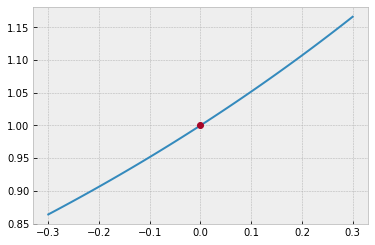

In [3]:
f = lambda h : (np.exp(h)-1)/h

h = np.linspace(-0.3, 0.3, 100)

plt.plot(h, f(h))
plt.plot(0, 1, 'o')
plt.show()

***

두번째 $a^x$에 대한 미분 과정은 다음과 같다. 

$$
\begin{aligned}
2) \quad \frac{d}{dx} a^x 
&= \lim_{h \to 0} \frac{a^{x+h} - a^x}{h} = \lim_{h \to 0} \frac{a^x a^h - a^x}{h} \\[10pt]
&= a^x \lim_{h \to 0} \frac{a^h -1}{h} \\[10pt]
&= a^x \ln a
\end{aligned}
$$

- 여기서도 $\lim_{h \to 0} \frac{a^h -1}{h} = \ln a$부분을 따로 보여야 하는데 위와 거의 동일한 과정으로 보일 수 있다. 

- $a^h-1=t$로 치환하면 $h=\log_a(1+t)$가 되고, $h \to 0$면 $t$ 또한 $t \to 0$이므로

$$
\lim_{h \to 0} \frac{a^h -1}{h} = \lim_{h \to 0} \frac{t}{\log_{a}(1+t)} = \lim_{h \to 0} \frac{1}{\frac{\log_{a}(1+t)}{t}} = \lim_{h \to 0} \frac{1}{\log_{a}(1+t)^{1/t}} = \frac{1}{\log_{a}e} = \ln a
$$

- 아래 코드로 그래프를 그려서 확인해보도록 하자.


0.6931471805599453


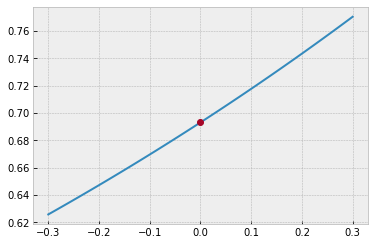

In [4]:
f = lambda a, h : (a**h - 1)/h
a = 2
h = np.linspace(-0.3, 0.3, 100)
print(np.log(a))
plt.plot(h, f(a, h))
plt.plot(0, np.log(a), 'o')
plt.show()

***

#### 지수 함수 미분 예제 $y = e^{2x}$

- 위 함수를 미분하기 위해 미분의 정의를 이용하면 다음과 같다.

$$
\begin{aligned}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{e^{2(x+h)} - e^{2x}}{h} = \lim_{h \to 0} \frac{e^{2x}e^{2h} - e^{2x}}{h} \\[10pt]
&= \lim_{h \to 0} \frac{e^{2x}(e^{2h} - 1)}{h} = e^{2x} \lim_{h \to 0} \frac{e^{2h} - 1}{h}\\[10pt] 
&= e^{2x} \cdot 2 \lim_{h \to 0} \frac{e^{2h} - 1}{2h} \\[10pt]
&= 2e^{2x} \quad \because \lim_{h \to 0}\frac{e^{h} - 1}{h}=1
\end{aligned}
$$

- 공식으로도 할 수 있는데 합성함수 미분 개념이 필요하므로 아래쪽에 합성함수 부분을 보고 다시보면 된다.

$$
u = 2x, y = e^u \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = e^u \cdot 2 =2e^{2x}
$$

- 이 경우도 `sympy`를 이용 하면 쉽게 결과를 얻을 수 있다.

In [5]:
x = sp.Symbol('x')

sp.diff(sp.E**(2*x), x)

In [6]:
sp.simplify(sp.diff(sp.log(x)/sp.exp(x), x))

### 로그 함수의 미분

#### 공식

$$
\begin{aligned}
&3) \quad \frac{d}{dx} \ln x = \frac{1}{x} \qquad x >0 \\[10pt]
&4) \quad \frac{d}{dx} \log_a x= \frac{1}{x \ln a} \qquad x >0, a>0, a \ne 1
\end{aligned}
$$

*** 


#### 증명

$$
\begin{aligned}
3) \quad \frac{d}{dx} \ln x 
&= \lim_{h \to 0} \frac{\ln(x+h) - \ln(x)}{h} =\lim_{h \to 0} \frac{\ln \left(\frac{x+h}{x}\right)}{h}  = \lim_{h \to 0} \frac{\ln \left(1 + \frac{h}{x}\right)}{h} \\[10pt]
&= \lim_{h \to 0} \ln \left(1 + \frac{h}{x}\right)^{1/h}
\end{aligned}
$$

- 여기서 괄호안이 1근방으로 가고 있기 때문에 자연상수 $e$의 정의를 이용하기 위해서 $\frac{h}{x} =z$로 두면 $\frac{x}{h} = \frac{1}{z}$이고 $\frac{1}{h}=\frac{1}{z}\frac{1}{x}$이다. 

- 또한 $h \to 0$이면 $z \to 0$이므로


$$
\begin{aligned}
\frac{d}{dx} \ln x 
&= \lim_{h \to 0} \frac{\ln(x+h) - \ln(x)}{h} =\lim_{h \to 0} \frac{\ln \left(\frac{x+h}{x}\right)}{h}  = \lim_{h \to 0} \frac{\ln \left(1 + \frac{h}{x}\right)}{h} \\[10pt]
&= \lim_{h \to 0} \ln \left(1 + \frac{h}{x}\right)^{1/h} \\[10pt]
&= \lim_{z \to 0} \ln \left(1 + z\right)^{\frac{1}{z}\frac{1}{x}} \qquad \because z=\frac{h}{x}\\[10pt]
&= \frac{1}{x}\lim_{z \to 0} \ln \left(1 + z\right)^{\frac{1}{z}} = \frac{1}{x}
\end{aligned}
$$

***


- 4)번 공식도 3번과 완전히 동일한 과정으로 보일 수 있다.

$$
\begin{aligned}
4) \quad \frac{d}{dx}\log_{a}x &=  \lim_{h \to 0} \frac{\log_{a}(x+h)-\log_{a}(x)}{h}= \lim_{h \to 0} \frac{\log_{a}\left( \frac{x+h}{x}\right)}{h} = \lim_{h \to 0} \frac{\log_{a}\left(1 + \frac{h}{x}\right)}{h} \\[10pt]
&= \lim_{h \to 0} \log_{a}\left(1 + \frac{h}{x}\right)^{1/h}\\[10pt]
&= \lim_{z \to 0} \log_{a}(1+z)^{\frac{1}{z}\frac{1}{x}} \qquad \because z= \frac{h}{x} \\[10pt]
&= \frac{1}{x} \lim_{z \to 0} \log_{a} (1+z)^{\frac{1}{z}} = \frac{1}{x} \log_{a}e = \frac{1}{x \ln a}
\end{aligned}
$$

- 또는 로그의 밑변환 공식을 이용하여서도 보일 수 있다.

$$
\begin{aligned}
4) \quad \frac{d}{dx}\log_{a}x &= \frac{d}{dx} \frac{\ln x}{\ln a} = \frac{1}{\ln a}\frac{d}{dx} \ln x = \frac{1}{x \ln a}
\end{aligned}
$$

***

#### 로그 함수 미분 예제 $y=\ln(x+1)$

- 미분의 정의를 이용하면

$$
\begin{aligned}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{\ln(x+1+h) - \ln(x+1)}{h} = \lim_{h \to 0} \frac{\ln\left( \frac{x+1+h}{x+1} \right)}{h} \\[10pt] 
&= \lim_{h \to 0} \frac{\ln \left(1+ \frac{h}{x+1} \right)}{h} = \lim_{h \to 0}\ln \left(1+ \frac{h}{x+1} \right)^{\frac{1}{h}} \\[10pt]
&=  \lim_{h \to 0}\ln \left[ \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} \right]^\frac{1}{x+1} \\[10pt]
&= \frac{1}{x+1} \lim_{h \to 0}\ln  \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} = \frac{1}{x+1} \ln  e = \frac{1}{x+1}
\end{aligned}
$$

- 공식으로 하면(합성함수 미분을 보고 다시 봐야함)

$$
u = x+1, y = \ln(u) \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = \frac{1}{u} \cdot 1 = \frac{1}{x+1}
$$

- 이 역시 `sympy`를 이용 하면 간단히 구할 수 있다.

In [7]:
x = sp.Symbol('x')

sp.diff(sp.log(x+1), x)

### 상수 미분

- 상수 함수는 입력에 대한 출력의 변화가 없기 때문에 미분계수는 항상 0이다.

$$
\frac{d c}{dx}  = 0
$$

### 곱의 미분

- 두 함수가 곱해진 경우 아래와 같은 규칙으로 도함수를 구할 수 있다.

#### 공식

$$
y = f(x)g(x), \qquad \frac{dy}{dx} = f'(x)g(x) + f(x)g'(x)
$$

*** 

#### 증명

$$
\begin{aligned}
\frac{d}{dx} f(x)g(x) &= \lim_{h \to 0} \frac{f(x+h)g(x+h)-f(x)g(x)}{h} \\[10pt]
&= \lim_{h \to 0} \frac{g(x+h)\left(f(x+h)-f(x)\right)+f(x)g(x+h)-f(x)g(x)}{h} \\[10pt]
&= \lim_{h \to 0} \frac{g(x+h)\left(f(x+h)-f(x)\right)+f(x)\left(g(x+h)-g(x)\right)}{h} \\[10pt]
&= \lim_{h \to 0} \frac{g(x+h)\left(f(x+h)-f(x)\right)}{h} + \lim_{h \to 0} \frac{f(x)\left(g(x+h)-g(x)\right)}{h} \\[10pt]
&= f'(x)g(x) + f(x)g'(x)
\end{aligned}
$$

*** 

#### 예제 $y = (3x^2 + x)(x^2 - x)$

$$
\begin{aligned}
\frac{dy}{dx} &= (3x^2 + x)'(x^2 - x) + (3x^2 + x)(x^2 - x)' \\[10pt]
&= (6x+1)(x^2 -x) + (3x^2 + x)(2x-1) \\[10pt]
&= 12x^3 - 6x^2 - 2 x
\end{aligned}
$$

### 분수함수 미분

#### 공식

$$
y = \frac{f(x)}{g(x)}, \qquad \frac{dy}{dx} =  \frac{f'(x)g(x) - f(x)g'(x)}{\{g(x)\}^2}
$$

*** 

#### 증명

$$
\begin{aligned}
\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right) &= \lim_{h \to 0} \frac{\frac{f(x+h)}{g(x+h)}-\frac{f(x)}{g(x)}}{h} = \lim_{h \to 0} \frac{\frac{f(x+h)g(x)-f(x)g(x+h)}{g(x+h)g(x)}}{h} \\[10pt]
&= \lim_{h \to 0} \frac{f(x+h)g(x)-f(x)g(x+h)}{h} \frac{1}{g(x+h)g(x)} \\[10pt]
&= \lim_{h \to 0} \frac{g(x)\left(f(x+h)-f(x)\right)+g(x)f(x)-f(x)g(x+h)}{h} \frac{1}{g(x+h)g(x)} \\[10pt]
&= \lim_{h \to 0} \frac{g(x)\left(f(x+h)-f(x)\right)-f(x)\left(g(x+h)-g(x)\right)}{h}\frac{1}{g(x+h)g(x)} \\[10pt]
&= \frac{f'(x)g(x) - f(x)g'(x)}{\{g(x)\}^2}
\end{aligned}
$$

*** 

#### 예제 $y = \dfrac{x^2}{x+3} $

$$
\begin{aligned}
\frac{dy}{dx} &= \frac{(x^2)'(x+3)- x^2 (x+3)'}{(x+3)^2} \\[10pt]
&= \frac{2x(x+3) -x^2 \cdot 1}{(x+3)^2} = \frac{x^2+6x}{(x+3)^2}
\end{aligned}
$$

- 위의 경우도 모두 sympy로 해결 가능

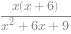

In [8]:
x = sp.Symbol('x')

sp.simplify(sp.diff(x**2 / (x+3), x))

### 합성함수 미분

- 함수 $y=(2x-4)^3$을 미분하려면 

In [9]:
x = sp.Symbol('x')

sp.expand((2*x-4)**3)

- 번거롭지만 위처럼 전개하고 각각 다항식 미분공식에 의해 미분하면 된다.

$$
\frac{d}{dx} (2x-4)^3 = \frac{d}{dx} 8x^3 - 48 x^2 + 96x -64 = 24x^2 - 96x + 96
$$

- 만약 3제곱이 아니라 100제곱이면 전개해서 미분할 수 있을까? 사실상 불가능해진다. 

- 따라서 다음과 같은 합성함수 공식을 이용하여 미분하게 된다.

- 두 함수 $y=f(u)$, $u=g(x)$가 미분 가능할 때, 합성함수 $y = f(g(x))$의 $x$에 대한 미분

$$
\frac{d\,y}{dx} =  \frac{d\,y}{du} \frac{d\,u}{dx} 
$$


- 예제의 경우 $u=g(x)=2x-4$, $y = u^3$로 두고 공식에 의해 간단히 미분할 수 있다.

$$
\frac{dy}{dx} = \color{RoyalBlue}{\frac{dy}{du}} \color{OrangeRed}{\frac{du}{dx}} = \color{RoyalBlue}{3(2x-4)^2}  \cdot \color{OrangeRed}{2}
$$

- 두함수 $y=f(u)$, $u=g(x)$가 각각 미분 가능할 때, 합성함수 $y=f(g(x))$의 도함수는 다음처럼 구해질 수 있다.

- $x$의 함수 $u=g(x)$의 독립변수의 변화량을 $\Delta x$, $u=g(x)$에서 $\Delta x$에 따른 $u$의 변화량을 $\Delta u$, 최종적으로 $u$의 함수 $y=f(u)$에서 $\Delta u$에 대한 함수의 변화량을 $\Delta y$라 하자.

- 그러면 다음처럼 쓸 수 있다.

$$
\frac{\Delta y}{\Delta x} = \frac{\Delta y}{\Delta u} \frac{\Delta u}{\Delta x}
$$

- $y=f(u)$, $u=g(x)$가 각각 미분 가능하므로

$$
\lim_{\Delta u \to 0}\frac{\Delta y}{\Delta u} = \frac{dy}{du}, \qquad \lim_{\Delta x \to 0}\frac{\Delta u}{\Delta x} = \frac{du}{dx}
$$

- 한편 $\Delta u = g(x+\Delta x) - g(x)$이고 함수 $g(x)$는 연속이므로 $\Delta x \to 0 \implies \Delta u \to 0$

- 이상의 결과를 이용하면 다음처럼 합성함수 미분을 보일 수 있다.

$$
\begin{aligned}
\frac{dy}{dx} &= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x} \\[10pt]
&= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta u} \frac{\Delta u}{\Delta x} \\[10pt]
&= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta u} \lim_{\Delta x \to 0} \frac{\Delta u}{\Delta x} \\[10pt]
&= \lim_{\Delta u \to 0} \frac{\Delta y}{\Delta u} \lim_{\Delta x \to 0} \frac{\Delta u}{\Delta x} \quad \because \Delta x \to 0 \implies \Delta u \to 0 \\[10pt]
&= \frac{dy}{du} \frac{du}{dx}
\end{aligned} \tag{*}
$$

- $\dfrac{dy}{du} = f'(u)= f'(g(x))$이고 $\dfrac{du}{dx}=g'(x)$이므로 (*)에 의해 $y' = f'(g(x)) g'(x)$가 된다.

- 이런 미분 규칙을 체인룰<sup>chain rule</sup>이라 한다.

- 아래는 `sympy`를 사용한 예제의 미분 결과 이다.

In [10]:
x = sp.Symbol('x')

sp.diff((2*x-4)**3, x)


- 합성함수의 미분계수는 합성되어진 각 함수의 미분계수를 서로 곱한 것과 같다는 사실을 알 수 있다. 따라서 매우 많은 함수가 $f(x) = g(h(i(j(k(l(m(n(...o(x)))))))))$ 처럼 겹겹이 합성되어있다 해도 각 함수의 미분계수를 구해서 곱해주면 $f(x)$의 미분계수를 구할 수 있다. 

$$
\frac{d}{dx}f(x) = \frac{dg(h)}{dh}\frac{dh(i)}{di}\frac{di(j)}{dj}\frac{dj(k)}{dk} \frac{dk(l)}{dl} \frac{dl(m)}{dm} \frac{dm(n)}{dn} \cdots \frac{do(x)}{dx}
$$

- 이 사실은 신경망 역전파 알고리즘의 기본 아이디어가 된다.

### 로지스틱 함수 미분

- 이제 분수함수의 미분과 합성함수의 미분을 알고 있으므로 함수편에서 소개한 로지스틱 함수의 미분을 할 수 있다.

- 로지스틱함수

$$
\sigma(z) = \frac{1}{1+\exp(-z)}
$$

- 미분 과정

$$
\begin{aligned}
\frac{d}{dz}\left( \frac{1}{1+\exp(-z)} \right) 
&= \frac{0 \cdot (1+\exp(-z))- 1 \cdot (1+\exp(-z))'}{\left(1+\exp(-z)\right)^2}\\[10pt]
&= \frac{-1 \cdot \exp(-z)(-1)}{\left(1+\exp(-z)\right)^2} = \frac{\exp(-z)}{\left(1+\exp(-z)\right)^2} \\[10pt]
&= \frac{1+ \exp(-z) -1}{\left(1+\exp(-z)\right)^2} \\[10pt]
&= \frac{1}{1+\exp(-z)} \times \frac{1+ \exp(-z) -1}{1+\exp(-z)} \\[10pt]
&= \frac{1}{1+\exp(-z)} \left( \frac{1+\exp(-z)}{1+\exp(-z)} - \frac{1}{1+\exp(-z)} \right) \\[10pt]
& = \sigma(z) (1-\sigma(z))
\end{aligned}
$$

- 마지막 약간 트릭을 써서 식을 정리하면 놀랍게도 로지스틱 함수의 도함수는 다른 어떤 계산도 필요없이 함수값만으로 바로 계산할 수 있다는 결과가 나온다. 

- 로지스틱 함수의 도함수는 신경망에서 자주 등장하므로 형태를 기억하면 도움이 된다.

### 다변수 미분

- 2변수 이상 함수에서 하나의 변수에 대해서만 미분하는 것을 편미분이라 하고 $\partial$은 편미분을 나타낼 때 쓰는 기호로 '라운드'라고 읽는다. 

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $x$에 대한 편도함수의 함수값(편미분계수)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial x}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 + h, y_0)-f(x_0, y_0)}{h}
$$

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $y$에 대한 편도함수의 함수값(편미분계수)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial y}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 , y_0+ h)-f(x_0, y_0)}{h}
$$

- 즉 한 변수를 고정하고 변화율을 알고싶은 변수만 변화를 주는 방식이다. 구체적인 예를 통해 알아보자.



#### 인터렉티브 예제 js/partial.html

<img src="imgs/partial.png" width="800">

- 위 그림은 $z = f(x,y)$인 2변수 실함수를 나타낸다. 

- 그림은 (1.07, -0.465)에서 편미분 계수를 나타내고 있다. 

- 그림 오른쪽 3차원 그래프에서 빨간선과 파란선이 교차하는 지점이 (1.07, -0.465)이다. 

- 미분계수 즉, 순간변화율은 (1.07, -0.465)에서 독립변수의 약간의 변화에 따른 함수값의 변화량을 나타낸다는 것을 앞서 살펴보았다. 

- 그런데 (1.07, -0.465)에서 독립변수의 약간의 변화를 어떻게 설정해야 할까? 독립변수가 변해갈 수 있는 방향이 무한대가 되어 독립변수의 미세한 변화라는 것 자체가 정의하기 힘들어진 상황이다.

- 어떤 임의의 방향으로 독립변수를 변화시키면서 함수값의 변화량을 계산할 수도 있다. 물론 이런 개념의 미분도 존재하나 좀 복잡하다.<sup>[wiki:direc_deriv]</sup> 

- 그래서 변화를 주는 방향을 각 변수의 축방향으로 고정하고 순간변화율을 생각하기로 한다. 관심있는 변수(변화를 주는 변수)이외의 변수는 고정이고 따라서 상수 취급한다.

-  위 그림에서 빨간선은 $y$를 -0.465로 고정시키고 $x$만 변화시켰을 때 얻을 수 있는 1차원 함수를 나타내고, 파란선은 $x$를 1.07로 고정시키고 $y$만 변화시켰을 때 얻을 수 있는 1차원 함수를 나타낸다. 

- 이렇게 얻어진 변수 하나짜리 함수에 대해서 각각 이전과 마찬가지로 미분하면 된다.

#### 편미분의 간단한 예 

- (4,-2)에서 $f(x,y) = x^2 + 3xy + y -3 $ 에 대해 $\partial f / \partial x$, $\partial f / \partial y$의 값을 구하시오.

$$
\begin{aligned}
&\frac{\partial f}{\partial x } = \frac{\partial}{\partial x} (x^2 + 3xy + y - 3) = 2x + 3y = 2\cdot4 + 3 \cdot (-2) = 2 \\[5pt]
&\frac{\partial f}{\partial y } = \frac{\partial}{\partial y} (x^2 + 3xy + y - 3) = 3x + 1 = 3 \cdot 4 + 1= 13
\end{aligned}
$$



In [11]:
x = sp.Symbol('x')
y = sp.Symbol('y')

sp.diff(x**2 + 3*x*y + y -3, x)

In [12]:
x = sp.Symbol('x')
y = sp.Symbol('y')

sp.diff(x**2 + 3*x*y + y -3, y)

#### 편미분의 응용

- 머신러닝에서 편미분의 가장 중요한 응용은 신경망의 경사도 벡터를 구하는 것이다. 

- 아직 경사도 벡터가 무엇인지 모르므로 여기서는 다른 재미있는 예를 하나 들어보자. 

- 첫째 우리는 앞서 신경망은 거대한 합성함수라는 것을 알아보았다. 

- 둘째 간단한 분류기를 엑셀파일로 만들어보았다. 

- 따라서 어떤 분류 작업을 하는 신경망은 이 둘을 합하면 될 것이다. 다음 그림을 보자.

<img src="imgs/net_vis1.png" width="800"/>


- 위 이미지에 있는 견종은 로티바일러라고 한다. 

- 가로, 세로 224x224개 픽셀로 이루어진 이 이미지를 네트워크에 입력한다. 즉, 입력은 50176개의 변수로 이루어진 다변수라고 볼 수 있다. 

- 따라서 네트워크의 입력노드는 224x224개가 있어야 할것이다. 그림에서 입력 노드의 개수를 나타내는 문자는 $D=50176$이다. 

- 중간층 $\mathbf{y}$를 몇단계 거쳐서 최종 출력 $\mathbf{c}$가 나오게 된다. 이 네트워크가 1000개 대상에 대해서 분류를 할 수 있다면 출력은 $c_1$에서 $c_{1000}$이 된다. 

- 이중 로티바일러에 해당하는 노드의 값이 제일크고 나머지 노드의 값들은 거의 0에 가까우면 이상적인 신경망일 것이다. 

- 이 신경망은 $f:\mathbb{R}^{224 \times 224} \to \mathbb{R}^C$라 할 수 있고 여기서 $C=1000$이다.

- 이제 다음 그림처럼 정답이 아닌 다른 노드는 다 지우고 정답 노드만 생각하도록 하자.  

<img src="imgs/net_vis2.png" width="800"/>


- 이렇게 놓고 보면 이 네트워크는 $f:\mathbb{R}^{224 \times 224} \to \mathbb{R}$인 다변수 스칼라 함수가 된다. 

- 이제 이 함수를 50176개 변수로 미분한 미분계수 50176개를 224x224로 배열해서 이미지처럼 그려보면 위 그림 왼쪽처럼 된다. 

- 이미지의 대부분은 회색으로 보이고 원 이미지에 개가 있던 위치에 희미하게 울긋불긋한 모습을 확인할 수 있다. 

- 미분계수를 함수의 민감도라고 보면 이 사진은 울긋불긋한 위치의 변수를 조금 변화시켰을 때 이 함수의 값이 크게 변한다는것을 보여주고 있다. 

- 신경망이 어떤 결정을 내릴때 입력의 어느 부분에 민감하게 반응하는지를 나타내는 위 이미지를 Saliency Maps<sup>[simonyan]</sup>이라 한다.

### 미분의 연쇄법칙<sup>[thomas]</sup>

- 일변수의 경우 합성함수 미분에서 본 것이 미분의 연쇄법칙, $x=g(t)$일 때 $w=f(x)$의 $t$에 대한 변화

$$
\frac{dw}{dt} = \frac{dw}{dx} \frac{dx}{dt} 
$$


<img src="imgs/chain1.png" width="250"/>

- 다변수 함수에 대해서도 동일한 규칙이 적용되며 다음과 같다. $y=f(t)$, $x=g(t)$일 때 $w=f(x,y)$의 $t$에 대한 변화

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt}
$$

<img src="imgs/chain2.png" width="400"/>

- 3변수 일때 $z=f_1(t)$, $y=f_2(t)$, $x=f_3(t)$일 때 $w=f(x,y,z)$의 $t$에 대한 변화

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt} + \frac{\partial w}{\partial z}\frac{dz}{dt}
$$

<img src="imgs/chain3.png" width="400"/>



### 소프트맥스 함수 미분

- 소프트맥스 함수는 다변수 벡터 함수라 미분 결과가 야코비안이 됨

- $j$번째 변수로 소프트맥스 함수의 $i$번째 요소를 미분

$$
\frac{\partial}{\partial z_j}s_i(\mathbf{z})=\frac{\partial}{\partial z_j}\frac{e^{z_i}}{\sum_{k=1}^{K}e^{z_k}}
$$

- 나눗셈의 미분을 적요하기 위해 일단 분자 분모를 각각 미분

#### $i=j$인 경우

- 분자 미분

$$
\frac{\partial}{\partial z_j}e^{z_i}=e^{z_j}
$$


- 분모 미분은 모든 $e_{z_k}$의 합을 $z_j$로 미분하는 것이므로 

$$
\frac{\partial}{\partial z_j}\sum_{k=1}^{K}e^{z_k}=e^{z_j}
$$

- 이제 나눗셈의 미분 공식에 결과를 대입하고 정리하면

$$
\begin{aligned}
\frac{\partial}{\partial z_j}s_i(\mathbf{z})
&=\frac{\partial}{\partial z_j}\frac{e^{z_i}}{\sum_{k=1}^{K}e^{z_k}}\\[10pt]
&=\frac{e^{z_j}\left(\sum_{k=1}^{K}e^{z_k}\right)-e^{z_j} \cdot e^{z_j}}{\left(\sum_{k=1}^{K}e^{z_k}\right)^2}\\[10pt]
&=\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}-\frac{e^{z_j} \cdot e^{z_j}}{\left(\sum_{k=1}^{K}e^{z_k}\right)^2}\\[10pt]
&=s_j(\mathbf{z})-\left(s_j(\mathbf{z})\right)^2\\[10pt]
&=s_j(\mathbf{z})(1-s_j(\mathbf{z}))
\end{aligned}
$$

#### $i \ne j$인 경우

- 분자 미분

$$
\frac{\partial}{\partial z_j}e^{z_i}=0
$$

- 분모 미분은 이전과 동일

- 따라서 다시 공식에 대입하고 정리하면

$$
\begin{aligned}
\frac{\partial}{\partial z_j}s_i(\mathbf{z})
&=\frac{\partial}{\partial z_j}\frac{e^{z_i}}{\sum_{k=1}^{K}e^{z_k}}\\[10pt]
&=\frac{0 \cdot \left(\sum_{k=1}^{K}e^{z_k}\right) - e^{z_i} \cdot e^{z_j}}{\left(\sum_{k=1}^{K}e^{z_k}\right)^2}\\[10pt]
&=\frac{-e^{z_i} \cdot e^{z_j}}{\left(\sum_{k=1}^{K}e^{z_k}\right)^2}\\[10pt]
&=-s_i(\mathbf{z})s_j(\mathbf{z})
\end{aligned}
$$

- 두 결과를 함께 쓰면

$$
\frac{\partial}{\partial z_j}s_i(\mathbf{z}) = 
\begin{cases}
s_j(\mathbf{z})(1-s_j(\mathbf{z}) ) & i=j\\[10pt]
-s_i(\mathbf{z})s_j(\mathbf{z}) & i\neq j
\end{cases} 
$$

- 위 처럼 인덱스 형태로 쓰지 않고 행렬 형태로 쓰면

$$
\frac{\partial}{\partial\mathbf{z}}\mathbf{s}(\mathbf{z})=
\left[
\begin{matrix} 
s_1(\mathbf{z})\left(1-s_1(\mathbf{z})\right) & 
-s_1(\mathbf{z})s_2(\mathbf{z}) & \cdots & 
-s_1(\mathbf{z})s_K(\mathbf{z})\\[10pt]
-s_2(\mathbf{z})s_1(\mathbf{z}) & 
s_2(\mathbf{z})\left(1-s_2(\mathbf{z})\right) & \cdots & 
-s_2(\mathbf{z})s_K(\mathbf{z})\\[10pt]
\vdots & \vdots & \ddots & \vdots \\[10pt]
-s_K(\mathbf{z})s_1(\mathbf{z}) & 
-s_K(\mathbf{z})s_2(\mathbf{z}) & \cdots & 
s_K(\mathbf{z})\left(1-s_K(\mathbf{z})\right)
\end{matrix}
\right]
$$

## 참고문헌

1. [wiki:deriv] Derivative#Notation_(details): https://en.wikipedia.org/wiki/Derivative

1. [paul] Paul's Online Math Notes, http://tutorial.math.lamar.edu/Classes/CalcI/DerivativeProofs.aspx

1. [wiki:direc_deriv] Directional derivative,  https://en.wikipedia.org/wiki/Directional_derivative

1. [simonyan] “Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps”, Karen Simonyan et al, ICLR Workshop 2014.

1. [thomas] Thomas' Calculus, Giordano, Weir, Finney, Pearson




In [14]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """
   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style("../../style.css")